## Flower Classification Exercise (Image Classification)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [0]:
style.use("ggplot")

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Load the Flower Data

In [0]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

fname = _URL.split('/')[-1]

zip_file = tf.keras.utils.get_file(fname=fname, origin=_URL, extract=True)

228818944/228813984 [==============================] - 3s 0us/step


In [0]:
flower_dir = fname.split('.')[0]
base_dir = os.path.join(os.path.dirname(zip_file), flower_dir)

In [0]:
!ls $base_dir
print()

!find $base_dir -type d -print

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers


In [0]:
class_labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

for inde_flower, flower in enumerate(class_labels):
  print("{}  : {}".format(inde_flower, flower))

0  : daisy
1  : dandelion
2  : roses
3  : sunflowers
4  : tulips


In [0]:
for class_ in class_labels:
  class_path = os.path.join(base_dir, class_)
  image_per_class = glob.glob(class_path + '/*.jpg')

  train = image_per_class[: round(len(image_per_class)*0.8)]
  val = image_per_class[round(len(image_per_class)*0.8) :]

  for train_img in train:
    if not os.path.exists(os.path.join(base_dir, 'train', class_)):
      os.makedirs(os.path.join(base_dir, 'train', class_))
    shutil.move(train_img, os.path.join(base_dir, 'train', class_))
  
  for val_img in val:
    if not os.path.exists(os.path.join(base_dir, 'val', class_)):
      os.makedirs(os.path.join(base_dir, 'val', class_))
    shutil.move(val_img, os.path.join(base_dir, 'val', class_))

In [0]:
!find $base_dir -type d -print

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/tulips
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/val
/root/.keras/datasets/flower_photos/val/roses
/root/.keras/datasets/flower_photos/val/tulips
/root/.keras/datasets/flower_photos/val/dandelion
/root/.keras/datasets/flower_photos/val/daisy
/root/.keras/datasets/flower_photos/val/sunflowers
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers


In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [0]:
!find $train_dir -type d -print
!find $validation_dir -type d -print

/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/tulips
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/val
/root/.keras/datasets/flower_photos/val/roses
/root/.keras/datasets/flower_photos/val/tulips
/root/.keras/datasets/flower_photos/val/dandelion
/root/.keras/datasets/flower_photos/val/daisy
/root/.keras/datasets/flower_photos/val/sunflowers


In [0]:
total_train = sum([len(os.listdir(os.path.join(train_dir, class_))) for class_ in class_labels])
total_validation = sum([len(os.listdir(os.path.join(validation_dir, class_))) for class_ in class_labels])

In [0]:
print("Total training images   : {}".format(total_train))
print("Total validation images : {}".format(total_validation))

Total training images   : 2935
Total validation images : 735


In [0]:
BATCH_SIZE = 100
IMG_SIZE = 150

### Data Augmentation

In [0]:
def plot_the_images(images_arr):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.grid(False)
  
  plt.tight_layout()
  plt.show()

#### Random Horizontal Flip

In [0]:
image_gen = ImageDataGenerator(horizontal_flip=True, rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='categorical', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


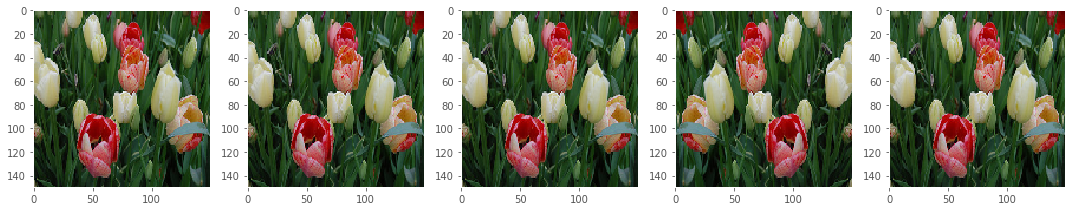

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_the_images(images_arr=augmented_images)

#### Random Rotation

In [0]:
image_gen = ImageDataGenerator(rotation_range=45, rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='categorical', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


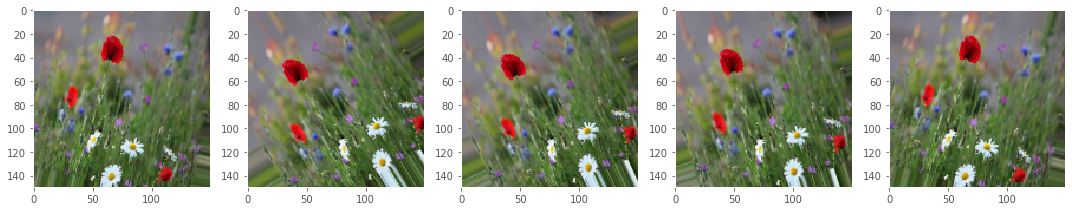

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_the_images(images_arr=augmented_images)

#### Random Zooming

In [0]:
image_gen = ImageDataGenerator(zoom_range=0.5, rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='categorical', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


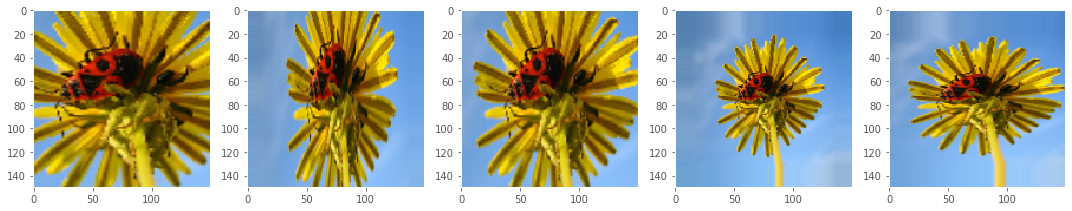

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_the_images(images_arr=augmented_images)

#### Put it all together

In [0]:
image_gen_train = ImageDataGenerator(rotation_range=45, 
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15, 
                                     zoom_range=0.5, 
                                     horizontal_flip=True, 
                                     rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(directory=train_dir, 
                                                     target_size=(IMG_SIZE, IMG_SIZE), 
                                                     class_mode='sparse', 
                                                     batch_size=BATCH_SIZE, 
                                                     shuffle=True)

Found 2935 images belonging to 5 classes.


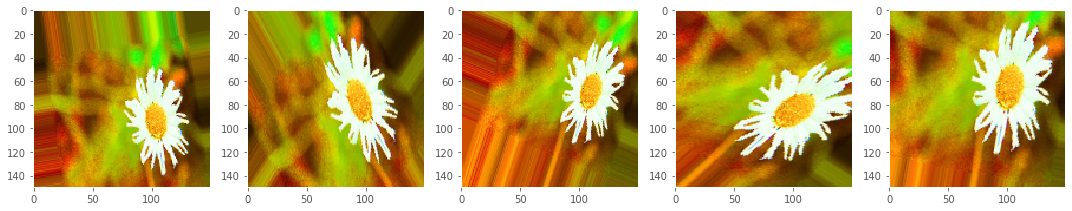

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_the_images(images_arr=augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

validation_data_gen = image_gen_val.flow_from_directory(directory=validation_dir, 
                                                        target_size=(IMG_SIZE, IMG_SIZE), 
                                                        class_mode='sparse', 
                                                        batch_size=BATCH_SIZE, 
                                                        shuffle=True)

Found 735 images belonging to 5 classes.


### Create the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=16, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu, 
                         input_shape=(150, 150, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Dropout(rate=0.2), 

  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=5, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

### Fit the Model

In [0]:
epochs = 50

history = model_1.fit_generator(generator=train_data_gen, 
                                steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))), 
                                epochs=epochs, 
                                validation_data=validation_data_gen, 
                                validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))))

Epoch 1/50
30/30 [==============================] - 32s 1s/step - loss: 1.4191 - accuracy: 0.4031 - val_loss: 1.1040 - val_accuracy: 0.5469
Epoch 2/50
30/30 [==============================] - 28s 930ms/step - loss: 1.1455 - accuracy: 0.5196 - val_loss: 1.1245 - val_accuracy: 0.5633
Epoch 3/50
30/30 [==============================] - 28s 927ms/step - loss: 1.0646 - accuracy: 0.5792 - val_loss: 0.9361 - val_accuracy: 0.6476
Epoch 4/50
30/30 [==============================] - 28s 931ms/step - loss: 1.0076 - accuracy: 0.6027 - val_loss: 0.9131 - val_accuracy: 0.6599
Epoch 5/50
30/30 [==============================] - 28s 930ms/step - loss: 0.9702 - accuracy: 0.6112 - val_loss: 0.9002 - val_accuracy: 0.6531
Epoch 6/50
30/30 [==============================] - 28s 933ms/step - loss: 0.9167 - accuracy: 0.6463 - val_loss: 0.9472 - val_accuracy: 0.6490
Epoch 7/50
30/30 [==============================] - 28s 930ms/step - loss: 0.8764 - accuracy: 0.6630 - val_loss: 0.8077 - val_accuracy: 0.6816
Ep

In [0]:
data = {
    'train_acc' : history.history['accuracy'], 
    'train_loss' : history.history['loss'], 
    'val_acc' : history.history['val_accuracy'], 
    'val_loss' : history.history['val_loss']
}

history_df = pd.DataFrame(data=data, index=history.epoch)
display(history_df.head(10))
display(history_df.tail(10))

,train_acc,train_loss,val_acc,val_loss
0,0.403066,1.423460,0.546939,1.104000
1,0.519591,1.147460,0.563265,1.124550
2,0.579216,1.061604,0.647619,0.936084
3,0.602726,1.011402,0.659864,0.913080
4,0.611244,0.972981,0.653061,0.900171
5,0.646337,0.917057,0.648980,0.947214
6,0.663032,0.881591,0.681633,0.807676
7,0.678705,0.848357,0.699320,0.792525
8,0.683475,0.822787,0.714286,0.768875
9,0.687223,0.815823,0.710204,0.778773


,train_acc,train_loss,val_acc,val_loss
40,0.795230,0.529593,0.789116,0.652621
41,0.813969,0.494158,0.789116,0.595962
42,0.814651,0.486259,0.763265,0.754746
43,0.810562,0.490892,0.782313,0.629427
44,0.808859,0.514479,0.780952,0.671277
45,0.823509,0.470411,0.791837,0.586589
46,0.817717,0.460750,0.751020,0.703808
47,0.822147,0.470040,0.801361,0.675863
48,0.830324,0.440286,0.789116,0.589157
49,0.836797,0.442701,0.776871,0.741691


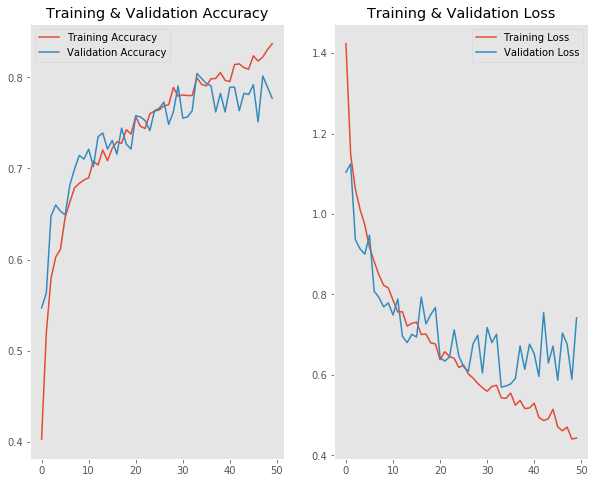

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Training & Validation Accuracy")
plt.plot(history_df.index, history_df['train_acc'], label="Training Accuracy")
plt.plot(history_df.index, history_df['val_acc'], label="Validation Accuracy")
plt.grid(False)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Training & Validation Loss")
plt.plot(history_df.index, history_df['train_loss'], label="Training Loss")
plt.plot(history_df.index, history_df['val_loss'], label="Validation Loss")
plt.grid(False)
plt.legend()

plt.savefig('./foo.png')
plt.show()